# Project 1: 
Candidatenumber: 10032
## Introduction
In this project I will look into how one could solve, or find a good enough solution to undetermined linear systems. These systems pop up everywhere in science, economics and other fields of mathematics, and would be very hard to get any use out of if it wasn't for the aid of computers. In task 1 and 2 I will generally look at different techniques for finding use (either solving or finding a solution that is close enough in the case where the system has no solution) in these equations, and which ones might be the most effective for a given problem. In task 3, things will become a little more *hands on*, and I attempt to seperate a merged image file into two seperate files containing the information of each of the images in the merged one.

### Task 1:
In this task I will look into how one could find a unique solution by putting additional constraints on the problem, and compare my own algorithm (using QR decomposition) with numPy's linear system solver.

#### a)
Letting $A\in \mathbb{R}^{m\times n}, \mathbf{x} \in \mathbb{R}^n, \mathbf{y} \in \mathbb{R}^m$ we wish to solve the system of linear equations of the form: $A \mathbf{x} = \mathbf{y}$

Looking at the special case of $m,n = 2,3$ we will investigate which properties $A$ and $\mathbf{y}$ must have in order for the  matrix equation to have no solution or infinitly many.


At first glance it might seem impossible for the system to have no solution. All $y \in \mathbb{R}$ can be expressed as a sum; $y = \sum a_i x_i$ for some $a_i, x_i \in \mathbb{R}, i = 1,2,3$. The only way this equality doesn@t hold is for $a_i = 0, i = 1,2,3...$ and $\mathbf{y} \neq 0$, i.e. A must have a row of zeros while the equivalent y is non zero. An example is:
$$
A = 
\left(\begin{array}{ccc} 
a & b & c\\
0 & 0 & 0
\end{array}\right)
\textrm{,      } y = 
\left(\begin{array}{c} 
d\\ 
1
\end{array}\right)
$$ 


A system of linear equations has infinitly many solutions if $rank(A) > m$, making one of the restrictions on the system redundant. If the system has more variables than non-zero equations, you can always tune the coefficents of the other basis-elements to fit a given one. An example is:

$$
A = 
\left(\begin{array}{ccc} 
a & b & c\\
d & e & f
\end{array}\right)
\textrm{,      } y = 
\left(\begin{array}{c} 
0\\ 
0
\end{array}\right)
$$


#### b)
Letting $A \in \mathbb{R}^{m \times n}$. We want to show $A^TA$ and $AA^T$ are symmetric, that is being it's own transpose, and that they are positive semi-definite. Using the simple identity of $(AB)^T = B^TA^T$ and $(A^T)^T = A$ it is easy to show:
$$
(A^TA)^T = (A)^T(A^T)^T = A^TA
$$
$$
(AA^T)^T = (A^T)^T(A)^T= AA^T
$$

A square matrix $M \in \mathbb{R}^{k \times k}$ is positive semi-definite if $\mathbf{z}^T M \mathbf{z} \geq 0$ for all $\mathbf{z} \in \mathbb{R}^k$

Using the fact that $\mathbf{z}^T\mathbf{z} = ||\mathbf{z}||^2$, the property of the norm $||\cdot|| \geq 0$, and letting $\mathbf{x} \in \mathbb{R}^n$ and $\mathbf{y} \in \mathbb{R}^m$ we have:

$$
\mathbf{x}^TA^TA\mathbf{x} = \mathbf{x}^T A^T (\mathbf{x}^T A^T)^T = ||\mathbf{x}^T A^T||^2 \geq 0
$$
$$
\mathbf{y}^T AA^T\mathbf{y} = \mathbf{y}^T A (\mathbf{y}^T A)^T = ||\mathbf{y}^T A||^2 \geq 0
$$

Note the difference in dimension of $AA^T \in \mathbb{R}^{m \times m}$ and $A^TA \in \mathbb{R}^{n \times n}$. We know the rank of a matrix-product is lower or equal to the rank of that of the smallest product. Given that A has full rank ( $rank(A) = m < n$ ), it follows that $rank(A^TA) = rank(AA^T) = m$.

$AA^T$ is therefore invertible, since $dim(AA^T) = rank(AA^T) = m$, but $A^TA$ is not, as $dim(A^TA) = n > rank(A^TA) = m$


#### c)
We have $\mathcal{L}(\mathbf{x},\mathbf{\lambda}) = \mathbf{x}^T\mathbf{x} + \mathbf{\lambda}^T(A\mathbf{x}-\mathbf{y}) = ||\mathbf{x}||^2 + \langle  \;\mathbf{\lambda}^T, (A\mathbf{x}-\mathbf{y})\; \rangle$, where $\langle  \; \cdot \; \rangle$ denotes the euclidean inner product.


We wish to solve the system of linear equations:
$$\nabla_x \mathcal{L}(\mathbf{x},\mathbf{\lambda}) = 0 = \nabla_{\lambda} \mathcal{L}(\mathbf{x},\mathbf{\lambda})$$
$$
\nabla_x \mathcal{L}(\mathbf{x},\mathbf{\lambda}) = 2\mathbf{x} + [\{\sum_{j=1}^{m} a_{ji}\lambda_j  \}_{i=1}^{n}]^T = 2\mathbf{x} + A^T\mathbf{\lambda}
\implies \mathbf{x} = -\frac{1}{2} A^T\mathbf{\lambda}
$$
$$
\nabla_{\lambda} \mathcal{L}(\mathbf{x},\mathbf{\lambda}) = A\mathbf{x}-\mathbf{y}
\implies \mathbf{x} = A^{-1}\mathbf{y}
$$
Substituting this into our first equation we get:
$$
2 \cdot (A^{-1}\mathbf{y}) = -A^T\mathbf{\lambda} \implies \mathbf{\lambda} = -2 \cdot A^{-T}A^{-1}\mathbf{y} = -2\cdot (AA^T)^{-1}
$$
$$
\implies \mathbf{x} = \frac{1}{2} 2 \cdot A^T(AA^T)^{-1}\mathbf{y}
$$

Which is what we wanted to show.



#### d)
Letting $A^T = QR$, where $Q \in \mathbb{R}^{n \times m}$ is orthogonal and $R \in \mathbb{R}^{m \times m}$ is upper triangular and using what we learned in 1c), the fact that $Q$ is orthogonal, and the identity $(AB)^{-1} = 
B^{-1}A^{-1}$:

$$
x_{min} = A^T(AA^T)^{-1}\mathbf{y}
= QR(R^TQ^TQR)^{-1}\mathbf{y}
= QR(R^TR)^{-1}\mathbf{y}
= QRR^{-1}R^{-T}\mathbf{y}
= QR^{-T}\mathbf{y}
$$


We wish to write a program that calculates the QR-decomposition for us, so we don't have to do it by hand, as it might be unfeasible for large systems (such as in this project). One could use Gram-Schmidt to find $Q$, but this method is numerically unstable. We will therefore implement the more stable, *Modified Gram-Schmidt*.

In [60]:
# Task 1d)
# (truncated) QR decomposition using Modified Gram-Schmidt
import numpy as np

def modified_gram_schmidt(A):
    '''
    Calculates an orthonormal basis of A
    
    Input:
        A: wide matrix, mxn, m<n
    Output:
        Q: matrix with columns equal to an orthonormal basis of A
    '''
    
    Q = np.zeros(A.shape)
    for j in range(min(A.shape)):                 # m<n, but function is general
        q = A[:,j]                                # q is j'th column of A
        for i in range(j):
            q = q - np.vdot(q, Q[:,i]) * Q[:,i]   # MGS algorithm
        Q[:,j] = q/np.linalg.norm(q, ord=2)       # Normalize so ||q|| = 1
    return Q

def QR_modified_gram_schmidt(A):
    '''
    Calculates the (truncated) QR-decomposition of a matrix, A using Modified Gram-Schmidt method
    
    Input:
        A, matrix, mxn, m<n
    Output:
        Q, orthogonal matrix, truncated, mxm
        R, upper-triangular matrix, nxn
    '''
    
    Q = modified_gram_schmidt(A)
    m,n = A.shape                      # m,n is shape of A
    R = np.zeros([n,n])
    for j in (range(n)):
        for i in range(j,n):
            R[j, i] = A[:, i] @ Q[:, j]
            
    return Q, R

#### e)

We want to calculate $\mathbf{x}_{min} = QR^{-T}\mathbf{y}$ without having to find $R^{-T}$, as finding inverses can be tricky and inefficient. Using the fact that $Q^{-1} = Q^T$ and letting $\mathbf{u} = Q^T\mathbf{x}_{min}$ we have:
$$
\mathbf{x}_{min} = QR^{-T}\mathbf{y} \implies \mathbf{y} = R^T Q^T \mathbf{x}_{min} = R^T \mathbf{u}
$$
Reducing our problem to solving a matrix equation with a triangular matrix and a standard matrix multiplication:
$$
R^T\mathbf{u} = \mathbf{y} \\
\mathbf{x}_{min} = Q\mathbf{u}
$$
where $R^T$ is a lower-triangular matrix.

In [61]:
def minimal_norm_QR(Q,R,b):
    '''
    Calculates x such that QRx = b for an orthonormal matrix Q and lower triangular matrix R
    Input:
        Q: Orthonormal matrix
        R: Lower-triangular matrix, NB! No elements on the diagonal can be zero
        b: RHS of matrix equation
    Output: 
        x: vec, such that QRx = b
    '''
    
    n = len(b)                          # Dimension of b
    u = np.zeros(n)                     # Allocating memory for solution vector
    
    for i in range(0,n):                # Forward substitution from exercise 1
        u[i] = b[i]/R.T[i,i]              
        for j in range(0,i):
            u[i] -= R.T[i,j]*u[j]/R.T[i,i]
    x = Q @ u
    return x

In [62]:
# Handed out code used to generate matrices
import scipy as sp
from scipy import linalg
def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """
    
    cov_eigvecs = np.random.uniform(-1.0,1.0,(m,m))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = sp.linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(chol, A)
    return A

In [63]:
# Test code for system in a)
m,n = 2,3
A = generate_A(m,n)                     # Generates random matrix
Q,R = QR_modified_gram_schmidt(A.T)     # Q and R
y = np.random.random(m)                 # Generate random y for RHS
x = minimal_norm_QR(Q,R,y)   # Solution using our algorithm
np.linalg.norm(A@x - y)                 # Difference (small is good)

4.775249788392737e-15

#### f)

In [64]:
# Code from supplementery
m,n = 1024, 4048
A = generate_A(m,n)
N = 100 # Number of test data we want to generate

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(4048, 100)
(1024, 100)


In [65]:
#%%timeit -r 1 -n 1
# Numpy method, np.linalg.solve
AAT = A @ A.T
np_solutions = np.zeros(X.shape)

In [66]:
#%%timeit -r 1 -n 1
# Numpy method, np.linalg.solve, timed independently from pre-calculations
for i in range(N):
    z = np.linalg.solve(AAT,Y[:,i])
    np_solutions[:,i] = A.T @ z
print(np.linalg.norm(X - np_solutions))     # The total difference between calculated x and correct x

549.7570256834692


In [67]:
#%%timeit -r 1 -n 1
# Our QR method
Q,R = QR_modified_gram_schmidt(A.T)     # Q and R
QR_solutions = np.zeros(X.shape)

In [68]:
#%%timeit -r 1 -n 1
# Our QR method, timed independently from pre-calculations
for i in range(N):
    QR_solutions[:,i] = minimal_norm_QR(Q,R,Y[:,i])   # Solution using our algorithm
print(np.linalg.norm(QR_solutions-X))

549.7570256834692


As we can see, there doesn't appear to be any difference in numerical accuracy. The numpy solution is however a lot faster. The precalculations for our QR method actually took longer than the iterations themselves, but both were *a lot* slower than the combined steps of the linalg.solve method. Not that surprising as np.linalg is very optimized.

### Task 2

#### a)
We have $T(\mathbf{x}) = ||A\mathbf{x}-\mathbf{y}||^2 + \mu ||\mathbf{x}||^2 = ||A\mathbf{x}||^2 - 2\langle  \; A\mathbf{x},\mathbf{y} \; \rangle + ||\mathbf{y}||^2 + \mu ||\mathbf{x}||^2$

$$
\implies \nabla_{\mathbf{x}} T(\mathbf{x}) = 2A^TA\mathbf{x} - 2A^T\mathbf{y} + 2\mu \mathbf{x} = 0
$$

$$
\implies A^TA\mathbf{x_r} + \mu \mathbf{x_r} = A^T\mathbf{y}
$$
$$
\implies (A^TA + \mu I)\mathbf{x_r} = A^T\mathbf{y}
$$


$A^TA + \mu I$ is clearly SPD, as $A^TA$ is SPD, as shown in 1b), and $\mu I$ is diagonal, and trivially SPD for all $0 < \mu \in \mathbb{R}$.

#### b)
Letting $A = U\Sigma V^T$ with $U,V$ being orthogonal, satisfying $U^{-1} = U^T$ and using $(A^TA + \mu I)\mathbf{x}_r  = A^T\mathbf{y}$ which we derived in a):

$$
(A^TA + \mu I)\mathbf{x}_r  = A^T\mathbf{y} \\
\implies (V\Sigma^T U^T U\Sigma V^T + \mu I)\mathbf{x}_r = V\Sigma^T U^T \mathbf{y}
$$

Using the fact that $\mu I$ is diagonal and $V$ being orthogonal, we have $\mu I = V \mu I V^T$, which in combination with the identity for diagonal matricies $D_1, D_2$, $VD_1V^T + VD_2V^T = V(D_1+D_2)V^T$ simplifies our expression:

$$
(V\Sigma^T \Sigma V^T + V\mu I V^T)\mathbf{x}_r = V\Sigma^T U^T \mathbf{y} \\
\implies V(\Sigma^T \Sigma + \mu I )V^T\mathbf{x}_r = V\Sigma^T U^T \mathbf{y}
$$

$\Sigma^T \Sigma + \mu I$ is diagonal and SPD, and therefore invertible $\implies \mathbf{x}_r = (V(\Sigma^T \Sigma + \mu I )V^T)^{-1} V\Sigma^T U^T \mathbf{y} =  V(\Sigma^T \Sigma + \mu I )^{-1}V^T V\Sigma^T U^T \mathbf{y}$ \
Letting $(\Sigma^T \Sigma + \mu I )^{-1}\Sigma^T = D$ be a diagonal matrix, which is only possible if $\Sigma$ is square, we have

$$
\mathbf{x}_r = VDU^T\mathbf{y}
$$
Which is what we wanted to show.

#### c)
Our code will be a lot faster if we calculate $D$ for hand, instead of having to calculate an inversion every iteration, which can be costly as mentioned previously. Thankfully it is very easy, since it $(\Sigma^T \Sigma + \mu I )^{-1}$ is diagonal. $\Sigma^T \Sigma = diag_{n\times n}(\sigma_1^2, \sigma_2^2,\ldots , \sigma_m^2, 0, \ldots , 0$), and $\mu I = diag_{n\times n}(\mu)$. The inverse of their sum is trivially $diag_{n\times n}(\{\sigma_i^2 + \mu\}_{i=1}^n)^{-1} = diag_{n\times n}(\{\frac{1}{\sigma_i^2 + \mu}\}_{i=1}^n)$, with $\sigma_i = 0$ for $m<i\leq n$. \
Multiplying with the $n\times m$ thin, rectangular matrix $\Sigma^T = \begin{pmatrix} \Sigma' \\ \mathbf{0} \end{pmatrix}$, with $\Sigma' = diag_{m\times m}(\{\sigma_i\}_{i=1}^m)$, and $\mathbf{0}$ being a $n-m \times m$ zero-matrix. \
The final product is then $D = diag_{n\times m}\{\frac{\sigma_i}{\sigma_i^2 + \mu}\}_{i=1}^n))$, again with $\sigma_i = 0$ for $m<i\leq n$

In [69]:
# Code for task c)
def Tikhonov_solveSVD(U,S,Vt,mu,y):        # add y vector as argument, assume mistake in task file
    '''
    Calculates the solution to the Tikhonov problem given SVD of matrix
    Input:
        U: mxm matrix, orthonormal
        S: mxn matrix, diagonal, singular values of A
        Vt: nxn matrix, orthonormal, transpose of V
        mu: scalar, regularization parameter
        y: mx1 vector, RHS of equation
    output:
        x_r: nx1 vector, solution to Tikhonov problem
    '''
    m = U.shape[0]             # U is mxm
    n = Vt.shape[0]             # V is nxn
     
    D = np.diag(S/(S**2+mu))   # This is the upper m rows of D
    D = D + np.zeros([n,m])    # Add the zero matrix for correct dimention
    
    x_r = Vt.T @ D @ U.T @ y   # Equation from b)
    return x_r

In [70]:
# Generating data for testing our system

m,n = 1024,4048
A = generate_A(m,n)

N = 100 # Number of test data we want to generate

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

y = Y[:,0]
x = X[:,0]

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(4048, 100)
(1024, 100)


In [71]:
#%%timeit -r 1 -n 1

# Using SVD method

N = 100
mu_SVD = np.logspace(5,-6,num = N)
error_SVD = np.zeros(N)

U,S,Vt = np.linalg.svd(A, full_matrices=False)

for i in range(N):
    x_r = Tikhonov_solveSVD(U,S,Vt,mu_SVD[i],y)
    error_SVD[i] = np.linalg.norm(x_r - x)
print(np.linalg.norm(error_SVD))

549.3855486594819


In [72]:
#%%timeit -r 1 -n 1

# Using numpy general solver

N = 100 
mu_numpy = np.logspace(5,-6, num=N)
error_np = np.zeros(N)

ATA = A.T @ A
ATy = A.T @ y
I = np.eye(max(A.shape))   # nxn identity matrix (n>m)

for i in range(N):
    x_r = np.linalg.solve(ATA + mu_numpy[i]*I, ATy)
    error_np[i] = np.linalg.norm(x_r - x)
print(np.linalg.norm(error_np))

549.3855474043451


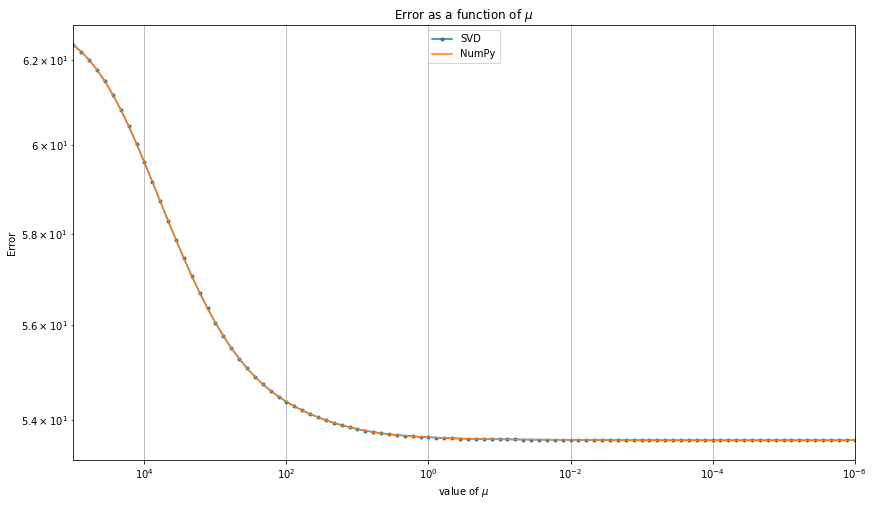

In [73]:
# Plotting error for both methods

import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8)

plt.loglog(mu_SVD, error_SVD,'.-',label="SVD")
plt.loglog(mu_numpy, error_np,'-',label="NumPy")
plt.legend(loc='upper center')
plt.grid()
plt.xlim(max(mu_SVD), min(mu_SVD))
plt.xlabel(r'value of $\mu$')
plt.ylabel('Error')
plt.title(r'Error as a function of $\mu$')
plt.show()

As we can see, a smaller value of $\mu$ seems to be better for our problem, for both the SVD-technique and the numpy-technique. The two techniques seem to have an equal relation to $\mu$, as we can see the plots are practically identical, which is not very surprising considering they are solving the same problem. \
Timewise it seems our code actually beats numpy! I would expect this timedifference to grow as a function of the system-size. Very cool!

### Task 3

#### a)
Letting $B = I-WW^T$, where $I$ is the identity, and $W$ has pairwise orthogonal coloumns, i.e. $||W|| = 1$, it can be shown that $B = B^n$ for all $n \in \mathbb{N}$. We will only show for the special case of n=2, but if it holds for n=2, it must hold for all $n \in \mathbb{N}$, as you can always just multiply with $B$ one more time.

$$
B^2 = (I-WW^T)(I-WW^T) = I-WW^T-WW^T+WW^TWW^T
$$
Using $W^TW = ||W||^2 = 1$ we get $B^2 = I-2WW^T + WW^T = B$ \
which is what we wanted to show.

B is clearly symmetric, as it a difference of symmetric matrices ($(WW^T)^T = WW^T$).

Using the definition of eigenvalues;
$$
B\mathbf{x} = \lambda \mathbf{x} = B^2\mathbf{x}\\
B(B\mathbf{x}) = B(\lambda \mathbf{x}) = \lambda(\lambda \mathbf{x}) = \lambda^2\mathbf{x} = \lambda\mathbf{x} \\
\implies \lambda^2 = \lambda \implies \lambda = \{0,1\}
$$

$\langle  \; A\mathbf{x},\mathbf{x} \; \rangle = \langle  \; \lambda \mathbf{x},\mathbf{x} \; \rangle = \lambda \mathbf{x}^T\mathbf{x} = \lambda \cdot ||\mathbf{x}||^2 \geq 0$ for $\lambda \in \{0,1\}$, \
making $B$ SPD.

### Tikhonov approach
#### c)
##### (1) 
Using the same approach as in 2a) with $T(\mathbf{x}) = ||A\mathbf{x}-\mathbf{y}||^2 + \mu_0 ||\mathbf{x}||^2$
$$
\nabla_{\mathbf{x}} T(\mathbf{x}) = A^T(A\mathbf{x}-\mathbf{y}) + 2\mu_0 \mathbf{x}^TB^TB = 0 \\
\implies A^TA\mathbf{x} + \mu \mathbf{x}^TB^TB = A^T\mathbf{y}
$$
Where $\mu = 2\mu_0$ Using $\mathbf{x}^TA = A\mathbf{x}$ we get

$$
(A^TA + \mu B^TB)\mathbf{x} = A^T\mathbf{y}
$$

For our special system, this becomes
$$
B =
\left(\begin{array}{cc} 
B_0 & 0\\
0 & B_1
\end{array}\right)
$$

$$
A = 
\left(\begin{array}{c} 
I & I
\end{array}\right)
$$

$$
\mathbf{x} =
\left(\begin{array}{cc} 
\mathbf{u} \\
\mathbf{v}
\end{array}\right)
$$

Substituting into equation from $(1)$ and using $B = B^2$, we get
$$
(A^TA + \mu B^TB)\mathbf{x} = A^T\mathbf{y}
$$

$$
\left(\begin{array}{c} 
\left(\begin{array}{c} 
I \\
I
\end{array}\right)
\left(\begin{array}{c} 
I & I
\end{array}\right)
+\mu
\left(\begin{array}{cc} 
B_0 & 0\\
0 & B_1
\end{array}\right)
\left(\begin{array}{cc} 
B_0 & 0\\
0 & B_1
\end{array}\right)
\end{array}\right)
\left(\begin{array}{c} 
\mathbf{u} \\
\mathbf{v}
\end{array}\right)
=
\left(\begin{array}{c} 
I \\
I
\end{array}\right)
\mathbf{y}
$$

<br>

$$
\left(\begin{array}{cc} 
\mu B_0+I & I\\
I & \mu B_1+I
\end{array}\right)
\left(\begin{array}{c} 
\mathbf{u} \\
\mathbf{v}
\end{array}\right)
=
\left(\begin{array}{c} 
\mathbf{y} \\
\mathbf{y}
\end{array}\right)
$$
With $B_0 = I-W_0W_0^T$ and $B_1 = I-W_1W_1^T$ we get

$$
\left(\begin{array}{cc} 
I +\mu (I-W_0W_0^T) & I\\
I & I+\mu (I-W_1W_1^T)
\end{array}\right)
\left(\begin{array}{c} 
\mathbf{u} \\
\mathbf{v}
\end{array}\right)
=
\left(\begin{array}{c} 
\mathbf{y} \\
\mathbf{y}
\end{array}\right)
$$

##### (2)

For readability, we will define $a_i := I+\mu(I-W_iW_i^T)$
$$
\left(\begin{array}{cc} 
a_0 & I\\
I & a_1
\end{array}\right)
\left(\begin{array}{c} 
\mathbf{u} \\
\mathbf{v}
\end{array}\right)
=
\left(\begin{array}{c} 
\mathbf{y} \\
\mathbf{y}
\end{array}\right)
$$
Which gives the two equations
$$
a_0 \mathbf{u} + I \mathbf{v} = y \\
I \mathbf{u} + a_1 \mathbf{v} = y
$$
Which can be rewritten to the form
$$
(I-a_1 a_0)\mathbf{u}=(I-a_1)\mathbf{y} \\
(I-a_0 a_1)\mathbf{v}=(I-a_0)\mathbf{y}
$$

We can define
$$
C_0 := (I-a_1 a_0)  \\
\mathbf{d}_0 := (I-a_1)\mathbf{y}
$$
and
$$
C_1 := (I-a_0 a_1) \\
\mathbf{d}_1 := (I-a_0)\mathbf{y}
$$
Making $C_0 \mathbf{u} = \mathbf{d_0}$ and $C_1 \mathbf{v} = \mathbf{d_1} $
##### (3)

We will try to solve the systems we deduced in (2).
I will utilize np.linalg.solve because it was a lot faster as we saw in task 1, without a loss in numerical accuracy. I see no numerical disadvantage to this. It will be both time efficient for the computer, and for me. The numpy libraries are brilliant, and have been optimized for decades to be as efficient and cheap as possible, using the C compiler.

In [74]:
def uv_decomposition(y,W0,W1,mu=0.1):
    '''
    Calculates the uv-decomposition of y using the given W0 and W1 matrices using Tikohnov regularization.
    Input:
        y: array with image data
        W0: Pre-calculated basis of 0-numbers
        W1: Pre-calculated basis of 1-numbers
        mu: Regularization parameter
    Output:
        u: array with images of 0-numbers
        v: array with images of 1-numbers
    '''
    I = np.eye((W0 @ W0.T).shape[0])          # Identity matrix
    
    alpha0 = I + mu*(I-(W0 @ W0.T))
    alpha1 = I + mu*(I-(W1 @ W1.T))
    
    C0 = I-(alpha1@alpha0)
    C1 = I-(alpha0@alpha1)
    
    u = []
    v = []
    
    for i in range(len(y[0])):
        d0 = (I-alpha1)@y[:,i]
        d1 = (I-alpha0)@y[:,i]
        
        u.append(np.linalg.solve(C0,d0))       # Using np.linalg.solve because it is faster, as we tested in task 1
        v.append(np.linalg.solve(C1,d1))   
    return u, v

In [75]:
# Loading data for testing
Mixes = np.load('Data/mixed.npy')
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')

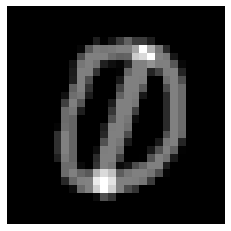

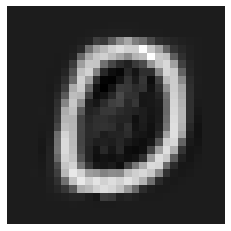

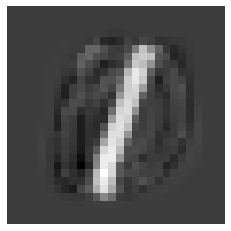

In [76]:
# Testing our seperation algorithm
u, v = uv_decomposition(Mixes, W0, W1)

# Plot of original image
plt.imshow(Mixes[:,1].reshape((28,28)), cmap = 'gray')
plt.axis('off') 
plt.show()

# Plot of our u vector
plt.imshow(u[1].reshape((28,28)), cmap = 'gray')
plt.axis('off') 
plt.show()

# Plot of our v vector
plt.imshow(v[1].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

The images are definately not perfect, but there is still a clear distiction between the two images, and it is obvious that $\mathbf{u}$ depicts the number zero, while $\mathbf{v}$ depicts the number one. For experimentation, I will test other values of $\mu$ to see if there will be less noise.

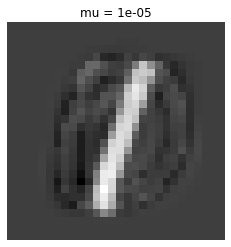

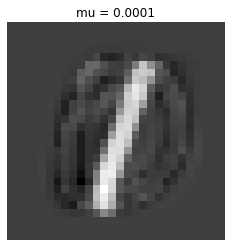

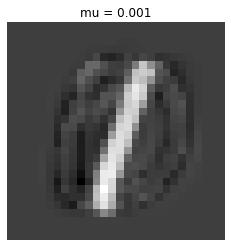

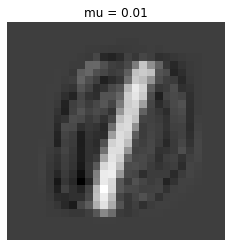

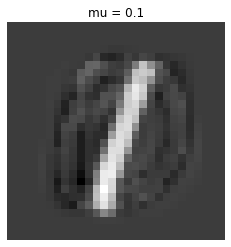

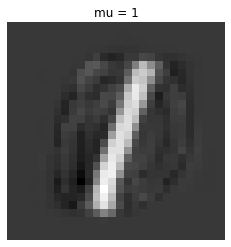

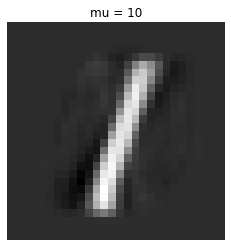

In [77]:
# Testing our seperation algorithm for different mu values

for mu in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    u, v = uv_decomposition(Mixes, W0, W1, mu = mu)
    plt.imshow(v[1].reshape((28,28)), cmap = 'gray')
    plt.axis('off')
    plt.title(f"mu = {mu}")
    plt.show()


After having tried a lot of values of $\mu$, none of them reduced the noise notacibly, except for $\mu = 10$, but this also distorted the depiction. In conclusion it seems our algorithm worked fine, but could probably use some optimization for more complicated systems.

## Conclusion
This project was immensly instructive, and it was really interesting to compare the effectiveness of our algorithms, and see that depending on the problem, one could write tailored code that is more efficient than just using a general solving library. It was a good motivation for future courses, and gave insight into why numerical mathematics is still an incredibly useful and intricate tool, even if we have things like numPy or Wolfram Alpha.

I would also like to note that it was nice that the project was based on the corriculum, and it made the lectures much more interesting as well.